In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('biovibeEEG_Data3.csv', header=None)
print(df.head())
df.index = range(len(df)) 

   0         1           2          3           4           5           6   \
0   0 -53417.54 -1136373.71 -924205.86  -951599.27 -1151996.50 -1120144.73   
1   0 -57416.44 -1141721.50      76.98 -1243439.45   182293.93 -2015640.77   
2   0 -38628.91 -1119539.09 -906601.99  -934035.63 -1134827.95 -1102670.41   
3   0 -37659.29 -1118579.13 -905268.40  -932711.69 -1133620.96 -1101425.06   
4   0 -30659.53 -1109925.25 -896272.27  -923816.94 -1124861.13 -1092573.50   

           7          8   9   ...  17  18  19  20  21  22  23  24  25  26  
0  -887627.24 -750091.60   0  ...   0   0   0   0   0   0   0   0   0   0  
1  1606258.94 -315060.34   0  ...   0   0   0   0   0   0   0   0   0   0  
2  -870325.65 -732748.43   0  ...   0   0   0   0   0   0   0   0   0   0  
3  -869078.96 -731479.75   0  ...   0   0   0   0   0   0   0   0   0   0  
4  -860406.03 -722609.68   0  ...   0   0   0   0   0   0   0   0   0   0  

[5 rows x 27 columns]


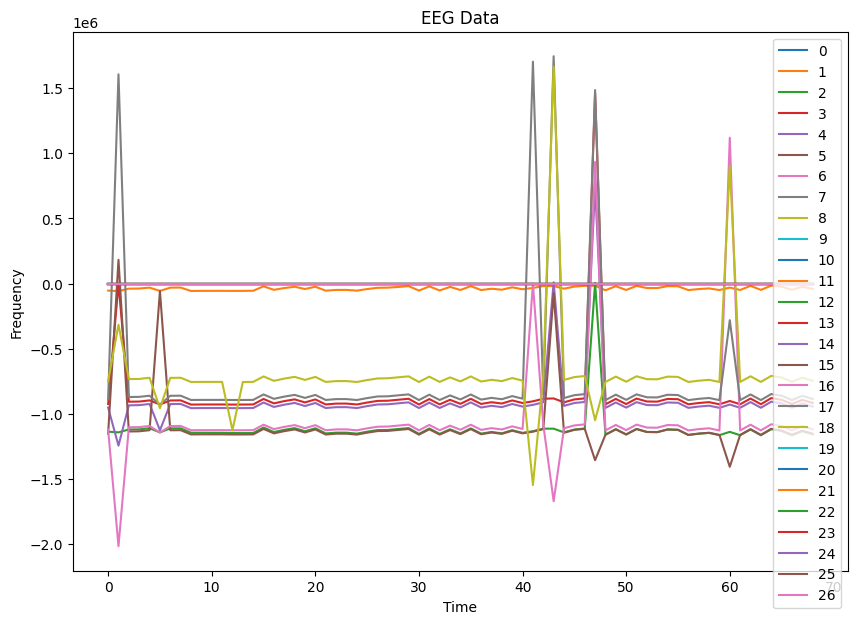

In [3]:
df.plot(kind='line', figsize=(10, 7))
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('EEG Data')
plt.show()